# Action Recognition

#### This code constructs action recognition models on a subset of the UCF101 dataset. The [UCF101 dataset](https://www.crcv.ucf.edu/data/UCF101.php) consists of a total of 13,320 videos spanning diverse human action categories. However, for this project, my focus narrows down to a subset of the dataset, comprising 2,355 training videos and 969 test videos distributed among 30 action categories. Included in the code below is:

1. Binary Classifier 
2. Multiclass Classifier

In [ ]:
import numpy as np
!pip install gdown

In [ ]:
!gdown --id 17awg7NPxFBWOnC2aMfIFYpBfUl7s1n69 # train feature
!gdown --id 1zcW5v-Jdv0BWeCpu6yMY9vZbSy7Va6j5 # train label
!gdown --id 1pLtKvbQml5M2aHjjtCpaV01fsSBBzd2v # test feature

with open('train_feature.npy', 'rb') as f:
  train_feature = np.load(f)
with open('train_label.npy', 'rb') as f:
  train_label = np.load(f)
with open('test_feature.npy', 'rb') as f:
  test_feature = np.load(f)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17awg7NPxFBWOnC2aMfIFYpBfUl7s1n69
From (redirected): https://drive.google.com/uc?id=17awg7NPxFBWOnC2aMfIFYpBfUl7s1n69&confirm=t&uuid=554024ae-0bbf-4bc0-a1e5-6a3fd862d866
To: /content/train_feature.npy
100% 386M/386M [00:04<00:00, 77.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zcW5v-Jdv0BWeCpu6yMY9vZbSy7Va6j5
To: /content/train_label.npy
100% 19.0k/19.0k [00:00<00:00, 34.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in vers

In [ ]:
print('Shape of train_feature: {0}'.format(train_feature.shape))
print('Shape of train_label: {0}'.format(len(train_label)))
print('Shape of test_feature: {0}'.format(test_feature.shape))

Shape of train_feature: (2355, 20, 2048)
Shape of train_label: 2355
Shape of test_feature: (969, 20, 2048)


In [ ]:
label_list = ['ApplyLipstick', 'BalanceBeam', 'BlowingCandles', 'BodyWeightSquats',
                    'BreastStroke', 'CleanAndJerk', 'CuttingInKitchen', 'Fencing',
                    'FieldHockeyPenalty', 'HandstandWalking', 'HighJump', 'JugglingBalls',
                    'JumpingJack', 'MoppingFloor', 'ParallelBars', 'PizzaTossing',
                    'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PullUps',
                    'PushUps', 'Rafting', 'RopeClimbing', 'Skijet',
                    'SkyDiving', 'StillRings', 'SumoWrestling', 'TaiChi',
                    'UnevenBars', 'VolleyballSpiking']

In [ ]:
#Download Videos
!gdown --id 1Vzu76rTBQucZCQpshSbV8C-lvr7WR2Ij

#https://drive.google.com/file/d/1Vzu76rTBQucZCQpshSbV8C-lvr7WR2Ij/view?usp=sharing
!tar xf "ucf101_subset_train.tar.gz"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Vzu76rTBQucZCQpshSbV8C-lvr7WR2Ij
From (redirected): https://drive.google.com/uc?id=1Vzu76rTBQucZCQpshSbV8C-lvr7WR2Ij&confirm=t&uuid=606a6716-c105-4613-8ed2-134dd5789d71
To: /content/ucf101_subset_train.tar.gz
100% 1.16G/1.16G [00:19<00:00, 60.8MB/s]


In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
print(train_df)

                           video_name                tag
0         v_ApplyLipstick_g08_c01.avi      ApplyLipstick
1         v_ApplyLipstick_g08_c02.avi      ApplyLipstick
2         v_ApplyLipstick_g08_c03.avi      ApplyLipstick
3         v_ApplyLipstick_g08_c04.avi      ApplyLipstick
4         v_ApplyLipstick_g09_c01.avi      ApplyLipstick
...                               ...                ...
2350  v_VolleyballSpiking_g24_c04.avi  VolleyballSpiking
2351  v_VolleyballSpiking_g25_c01.avi  VolleyballSpiking
2352  v_VolleyballSpiking_g25_c02.avi  VolleyballSpiking
2353  v_VolleyballSpiking_g25_c03.avi  VolleyballSpiking
2354  v_VolleyballSpiking_g25_c04.avi  VolleyballSpiking

[2355 rows x 2 columns]


In [ ]:
# Displaying video in notebook
from moviepy.editor import VideoFileClip

In [ ]:
def video_to_gif(video_filename):
  videoClip = VideoFileClip(video_filename)
  gif_filename = '{0}.gif'.format(video_filename.split('/')[1])
  videoClip.write_gif(gif_filename)
  return gif_filename

In [ ]:
from IPython.display import Image
sample_filename = '/'.join(['train', train_df.loc[100, 'video_name']])
print(train_df.loc[100, 'tag'])
print(sample_filename)
gif_filename = video_to_gif(sample_filename) 
Image(open(gif_filename,'rb').read()) 

In [ ]:
# Initializing Samples and flattened
n_samples = train_feature.shape[0]
n_feat = train_feature.shape[1] * train_feature.shape[2]
flattened = train_feature.reshape(n_samples, n_feat)
n_feat_test = test_feature.shape[1] * test_feature.shape[2] 
n_samples_test = test_feature.shape[0]
flattened_test = test_feature.reshape(n_samples_test, n_feat_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.98)
pca.fit(flattened)
pca_tr = pca.transform(flattened)
test_pca = pca.transform(flattened_test)
pca_tr.shape

In [ ]:
train_label.shape

(2355, 1)

In [ ]:
t_lab = np.where(train_label == 11, 1, 0).reshape((2355,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting train and validation
X_train, X_val, y_train, y_val = train_test_split(pca_tr, t_lab, test_size=0.3)

# Search Space
search_space = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2', 'None'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 10000, 100000],
    'max_iter': [75, 100, 150]
}

# Grid Search
weights = {0: 1, 1: 10}
log_model = LogisticRegression(class_weight=weights)
grid_search = GridSearchCV(log_model, search_space, cv=5, scoring='f1_macro', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best parameters:", best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .C=0.001, max_iter=75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .C=0.001, max_iter=75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .C=0.001, max_iter=75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .C=0.001, max_iter=75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .C=0.001, max_iter=75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .C=0.001, max_iter=75, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END .C=0.001, max_iter=75, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END .C=0.001, max_iter=75, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END .C=0.001, max_iter=75, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END .C=0.001, max_iter=75, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.001, max_iter=100, penalty=l1, solv

In [ ]:
best_log = LogisticRegression(**best_params, class_weight=weights)
best_log.fit(X_train, y_train)
# Predict the labels for the validation set
y_pred_val = best_log.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
report = classification_report(y_val, y_pred_val)
print("Test set accuracy:", accuracy)
# print("Report:\n", report)

Test set accuracy: 0.9292786421499293


In [ ]:
best_log = LogisticRegression(**best_params, class_weight=weights)
best_log.fit(pca_tr, t_lab)
y_pred= best_log.predict(test_pca)

In [ ]:
import numpy as np


num_test = 969

import pandas as pd

test_submission = pd.DataFrame({
    'id':list(range(num_test)),
    'predicted':list(y_pred.astype('int32'))})
print(test_submission.shape)
test_submission.head()
# submit the CSV file to the corresponding Kaggle competition.
test_submission.to_csv('submission.csv', index=False)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(pca_tr, train_label, test_size=0.3)

# Define the parameter grid for hyperparameter tuning
search_space = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000],
    'max_iter': [50, 75, 100, 125, 150]
}

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, search_space, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the SVM classifier with the best parameters and probability enabled
best_svm = svm.SVC(kernel='linear', probability=True, **best_params)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
print("Test set accuracy:", accuracy)
y_pred = best_svm.predict(test_pca)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


Best Parameters: {'C': 0.001, 'max_iter': 75}


Test set accuracy: 0.9490806223479491



In [ ]:
import numpy as np

#Number
num_test = 969

import pandas as pd

# IMPORTANT: use 'id' and 'predicted' as the column names
test_submission = pd.DataFrame({
    'id':list(range(num_test)),
    'predicted':list(y_pred.astype('int32'))})
print(test_submission.shape)
test_submission.head()
# submit the CSV file to the corresponding Kaggle competition.
test_submission.to_csv('inshallah2.csv', index=False)

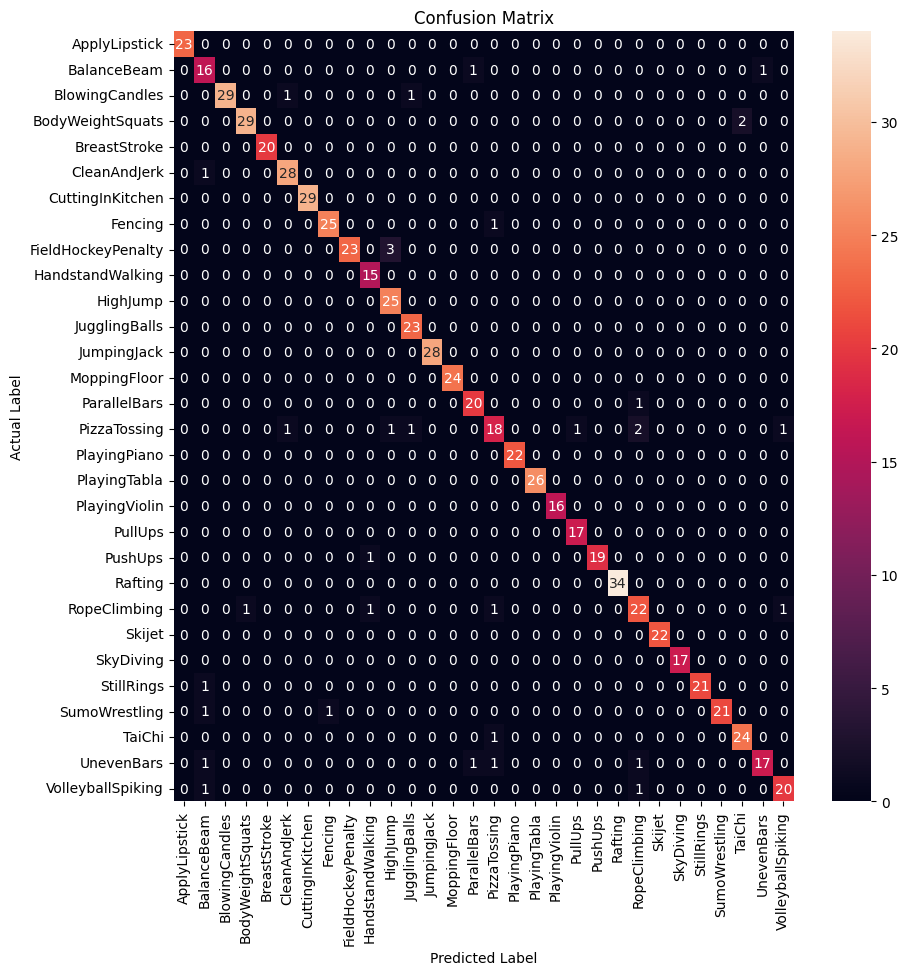

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(pca_tr, train_label, test_size=0.3, random_state=42)  # Ensure this matches your previous code

# Retrain the model with the best parameters found
best_svm.fit(X_train, y_train)

# Calc. y_pred
y_pred = best_svm.predict(X_val)  


# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_list, yticklabels=label_list)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


True Label: ApplyLipstick
Predicted Label: PizzaTossing
Top-5 Predicted Labels: ['PizzaTossing','RopeClimbing',  'ApplyLipstick', 'HighJump', 'BalanceBeam']
Video Filename: v_ApplyLipstick_g12_c03.avi
MoviePy - Building file v_ApplyLipstick_g12_c03.avi.gif with imageio.


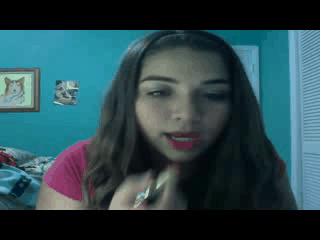

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import numpy as np

# Ensure y_val and y_pred are numpy arrays
y_val_array = np.array(y_val)
y_pred_array = np.array(y_pred)

# Get class probabilities for the validation set
probs = best_svm.predict_proba(X_val)

# Find indices of misclassified samples
misclassified_indices = np.where(y_val_array != y_pred_array)[0]

if misclassified_indices.size > 0:
    for misclassified_index in misclassified_indices:
        # Directly getting scalar values for indexing
        true_label_index = y_val_array[misclassified_index]
        predicted_label_index = y_pred_array[misclassified_index]

        # Check and convert to int if not already (helpful for arrays of objects or unusual formats)
        true_label_index = int(true_label_index) if not isinstance(true_label_index, int) else true_label_index
        predicted_label_index = int(predicted_label_index) if not isinstance(predicted_label_index, int) else predicted_label_index

        # Now we ensure these indices are treated as scalar integers
        if true_label_index != predicted_label_index:
            true_label = label_list[true_label_index]
            predicted_label = label_list[predicted_label_index]

            print(f"True Label: {true_label}")
            print(f"Predicted Label: {predicted_label}")

            # Getting the indices of the top-5 predictions
            top5_indices = np.argsort(probs[misclassified_index])[-5:][::-1]
            top5_labels = [label_list[i] for i in top5_indices]
            print(f"Top-5 Predicted Labels: {top5_labels}")

            # Retrieve video filename for the misclassified sample
            video_filename = train_df.iloc[misclassified_index]['video_name']
            print(f"Video Filename: {video_filename}")

            # Convert to gif
            gif_filename = video_to_gif("train/" + video_filename)  # Ensure the video_to_gif function is defined
            display(Image(open(gif_filename, 'rb').read()))

            # Break after handling the first truly misclassified sample
            break
else:
    print("No misclassified samples found.")
